In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
# ensure all the plot are inline
%matplotlib inline 
sns.set()

# import data
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
# view the first few lines of training data
titanic_train.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_train.info()
# as you can see there are total 891 observation in this dataset. everything looks fine except Age, Cabin, and Embarked.
# these column are missing variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# view the first few lines of testing dat
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


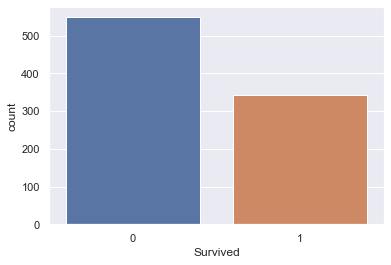

In [5]:
# use seaborn to build a bar plot of titanic survival
sns.countplot(x = 'Survived', data = titanic_train);
# in training set, less people were actually survived.

In [6]:
# Now construct the first model predict that nobody survived (Prediction_1)
# this is a bad model. However, it can be our baseline: any model we build later need to do better than this one.
titanic_test['Survived'] = 0
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/no_survivors.csv', index = False)
# ***** after upload to Kaggle, we have 62.7 accuracy, which means 62.7% are correct <-  this is our baseline ****

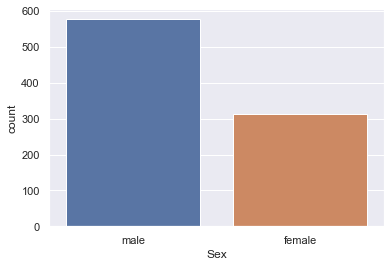

In [7]:
# Use seaborn to build a bar plot of Titanic dataset feature 'Sex' (of our Training data)
sns.countplot(x = 'Sex', data = titanic_train);

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


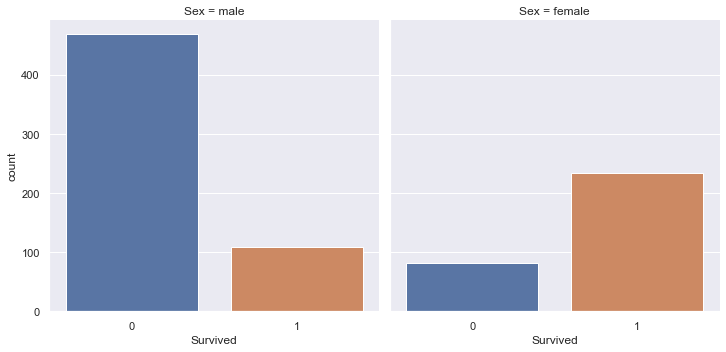

In [8]:
# Now we build a bar plots of our dataset features 'Survived' split over the feature 'Sex':
sns.factorplot(x = 'Survived', col = 'Sex', data = titanic_train, kind = 'count');
# From the data, it looks like women were more likely to survive than men. 

In [9]:
# Now we need to figure out exactly how many women and men did survived.
titanic_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [10]:
print(f"the % of women survived is {titanic_train[titanic_train.Sex == 'female'].Survived.sum()/titanic_train[titanic_train.Sex == 'female'].Survived.count()}.\n")
print(f"the % of men survived is {titanic_train[titanic_train.Sex == 'male'].Survived.sum()/titanic_train[titanic_train.Sex == 'male'].Survived.count()}.\n")
# about 74% women survived, and about 19% of the men survived      


the % of women survived is 0.7420382165605095.

the % of men survived is 0.18890814558058924.



In [11]:
# Now construct second model and predict that all women survived and all men didn't 
# it is unrealistic model. However, it will provide another baseline which to compare future models.
titanic_test['Survived'] = titanic_test.Sex == 'female'
titanic_test['Survived'] = titanic_test.Survived.apply(lambda x: int(x)) # turn all True to 1 and False to 0
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/women_survive.csv', index = False)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [12]:
# The New Kaggle Accuracy is 76.6%

In [13]:
# Start to build a ML model

# Store target variable of training data in a safe place
survived_train = titanic_train.Survived

# Concatenate training and test sets
data1 = pd.concat([titanic_train.drop(columns = ['Survived']), titanic_test])
data1 = data1.drop(columns=['Survived'])
data1.info()

# Age, Fare are missing something


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [14]:
# Impute missing numerical variables
data1['Age'] = data1.Age.fillna(data1.Age.median())
data1['Fare'] = data1.Fare.fillna(data1.Fare.median())
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [15]:
# Since we want to encode our data with numbers, we need to change 'male' and 'female' to numbers. 
# We can use pandas function get_dummies to do so:
data1 = pd.get_dummies(data1, columns = ['Sex'], drop_first = True)
data1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [16]:
# Select columns and vew head
data1 = data1[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp']]
data1.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  1309 non-null   uint8  
 1   Fare      1309 non-null   float64
 2   Age       1309 non-null   float64
 3   Pclass    1309 non-null   int64  
 4   SibSp     1309 non-null   int64  
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


In [18]:
# Decision Tree Classifier

# First, Split the entire data back into training and testing two groups:
data1_train = data1.iloc[:891]
data1_test = data1.iloc[891:]

# We will use scikit-learn, which requires our data as arrays, hence we need to transform DataFrame into arrays:
x = data1_train.values
test = data1_test.values
y = survived_train.values
print(type(x))

#print('')
#print(y)

# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(x, y)

<class 'numpy.ndarray'>


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
# Make predictions and store in 'Survived' Column of df_test
Y_pred = clf.predict(test)
titanic_test['Survived'] = Y_pred

In [20]:
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/decision_tree.csv', index = False)

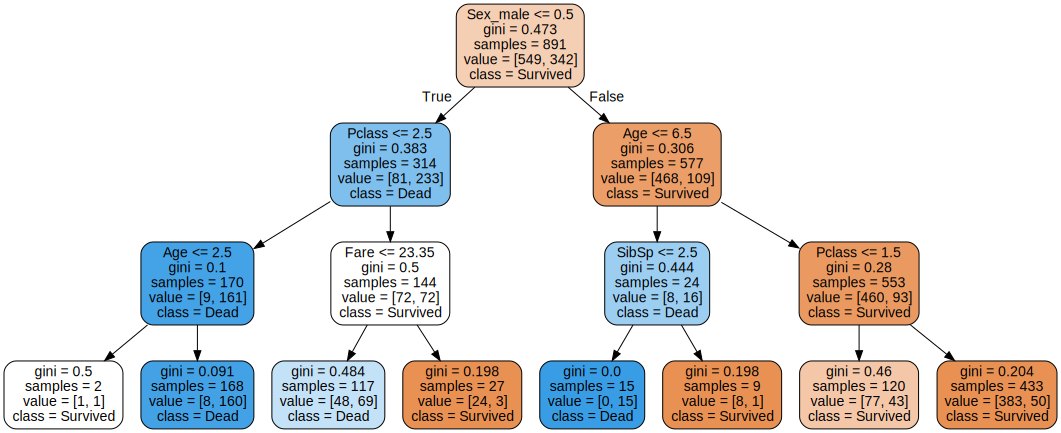

In [24]:
# decision tree visualization
        
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = data1.columns,
                                class_names = ['Survived','Dead'],
                                label = 'all',
                                rounded = True,
                                filled = True)

graph = graphviz.Source(dot_data, format="png")
graph

#  feature_names = ['age','gender'], 
#                                class_names = sorted(y.unique()), # display class to each node
#                                label = 'all', # every node has label that can read
#                                rounded = True, # have rounded corner
#                                filled = True) # each box is filled with color

In [25]:
graph.render(filename = 'Decision Tree') 

'Decision Tree.png'

In [ ]:
# random forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(x, y)
Y_prediction = random_forest.predict(test)

random_forest.score(x, y)
acc_random_forest = round(random_forest.score(x, y)* 100,2)
print(acc_random_forest)

In [ ]:
titanic_test['Survived'] = Y_prediction
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/Random_forest.csv', index = False)


In [ ]:
# K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x,y)
Y_knn_pred = knn.predict(test)
acc_knn = round(knn.score(x, y)*100, 2)
titanic_test['Survived'] = Y_knn_pred
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/Knn_prediction.csv', index = False)

In [ ]:
# K-means 
kmeans = KMeans(n_clusters = 2) # Since the passenger are either Survived or Dead
kmeans.fit(x)


In [ ]:
correct = 0
for i in range(len(x)):
    predict_me = np.array(x[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct +=1
        
print(correct/len(x))

In [ ]:
# Gaussian Naive Bayes:
gaussian= GaussianNB()
gaussian.fit(x,y)
Y_NB_pred = gaussian.predict(test)
titanic_test['Survived'] = Y_NB_pred
titanic_test[['PassengerId', 'Survived']].to_csv('prediction/Naive_bayes_prediction.csv', index = False)